In [1]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
f = open('hurriyet.txt', 'r', encoding='utf8')
text = f.read()
t_list = text.split('\n')

corpus = []

for cumle in t_list:
    corpus.append(cumle.split())

In [3]:
corpus[1]

['gösterilerde',
 'fitnecilere',
 'ölüm',
 'münafıklara',
 'ölüm',
 'abd',
 'ye',
 'ölüm',
 'ingiltere',
 'ye',
 'ölüm',
 'sloganları',
 'atıldı']

In [4]:
corpus[2]

['dini',
 'lider',
 'ali',
 'hamaney',
 've',
 'cumhurbaşkanı',
 'mahmud',
 'ahmedinejad',
 'ı',
 'destekleyen',
 'iranlılar',
 'son',
 'olaylarda',
 'yeğeni',
 'öldürülen',
 'mir',
 'hüseyin',
 'musevi',
 'başta',
 'olmak',
 'üzere',
 'muhalefet',
 'liderlerini',
 'kınadılar']

In [5]:
corpus[3]

['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu']

In [7]:
# KElime vektorleri 100 uzunlugunda
# merkezdeki kelimenin sag ve solunda +5,-5 kelimeye bakiyor
# min_count=5 nadir kelimeleri ele
# sg=1 skip-gram

model = Word2Vec(corpus, size=100, window=5, min_count=5, sg=1)

In [8]:
model.wv['ankara']

array([ 6.23503961e-02, -7.90302455e-02, -1.93952978e-01, -1.47304356e-01,
        8.43070626e-01, -6.55275118e-03, -3.23437840e-01,  2.13758573e-02,
        5.89604795e-01,  8.22912827e-02, -2.24978179e-01, -3.44423383e-01,
       -7.05383569e-02, -4.00416493e-01,  2.23325461e-01,  1.35895982e-01,
        2.63318539e-01, -2.43356407e-01, -1.80563599e-01, -1.69475958e-01,
       -3.23115140e-01,  3.64591628e-01, -4.03618038e-01,  2.31902301e-01,
       -1.46229044e-01, -3.99429739e-01, -4.76835892e-02, -1.73669323e-01,
       -4.81626272e-01,  2.36328170e-01,  7.86209881e-01, -2.12706327e-02,
        4.86473083e-01, -1.66113809e-01,  4.97678407e-02, -1.20054744e-01,
       -4.64968741e-01,  5.05252481e-01,  3.55833173e-01,  1.97580099e-01,
       -2.66714483e-01, -1.58404037e-01,  3.09939474e-01, -1.99972168e-01,
       -1.15878558e+00,  1.08389761e-02, -3.48166116e-02, -8.35127309e-02,
        7.30371058e-01,  4.00890827e-01,  1.11999447e-02, -5.64945161e-01,
        2.98885912e-01, -

In [9]:
model.wv.most_similar('youtube')

[('twitter', 0.7543126344680786),
 ('facebook', 0.7330607175827026),
 ('whatsapp', 0.7320181131362915),
 ('paylaşım', 0.7231199741363525),
 ('twıtter', 0.7213077545166016),
 ('internete', 0.7190455198287964),
 ('sitelerine', 0.6985442638397217),
 ('video', 0.6880125403404236),
 ('sayfasına', 0.6814849376678467),
 ('sitelere', 0.6756142377853394)]

# Modeli kaydetmek

In [10]:
model.save('word2vec.model')

In [11]:
model = Word2Vec.load('word2vec.model')

In [9]:
def closestwords_tsneplot(model, word):
    word_vectors = np.empty((0,100))
    word_labels = [word]
    
    close_words = model.wv.most_similar(word)
    
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)
        
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')
        
    plt.show()

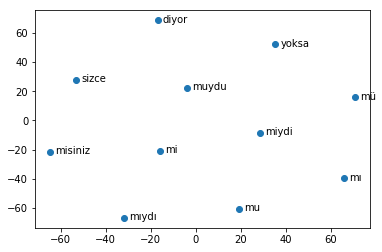

In [10]:
closestwords_tsneplot(model, 'mu')

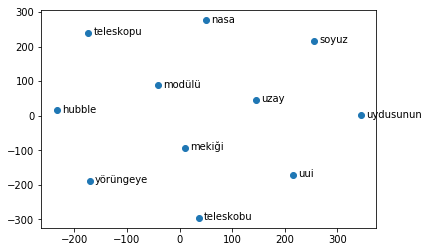

In [11]:
closestwords_tsneplot(model, 'uzay')

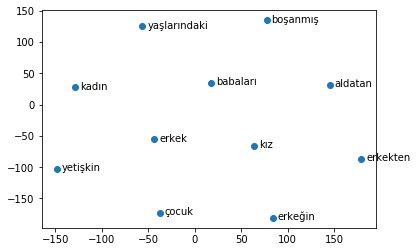

In [12]:
closestwords_tsneplot(model, 'erkek')

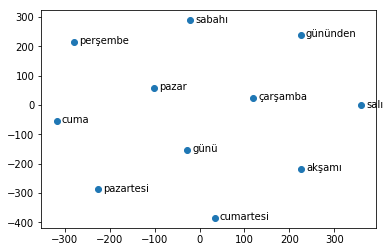

In [13]:
closestwords_tsneplot(model, 'pazartesi')

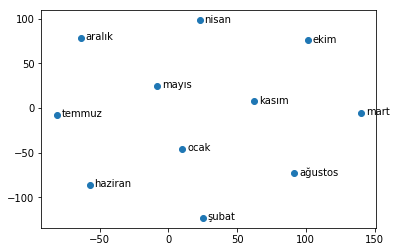

In [14]:
closestwords_tsneplot(model, 'kasım')

In [15]:
model.most_similar(positive=['akşam', 'bugün'], negative=['sabah'], topn=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('yarın', 0.7314040660858154)]

In [16]:
model.most_similar(positive=['akşam', 'sonra'], negative=['sabah'], topn=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('önce', 0.715567409992218)]

In [17]:
model.most_similar(positive=['anne', 'baba'], negative=['kadın'], topn=5)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('babası', 0.6592650413513184),
 ('annesi', 0.6421787738800049),
 ('babasını', 0.6320700645446777),
 ('ablası', 0.6252815127372742),
 ('kızı', 0.5991469025611877)]

In [18]:
model.most_similar(positive=['iyi', 'suçlu'], negative=['kötü'], topn=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('suçsuz', 0.6093930006027222)]